# sklearn学习之线性回归

In [4]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import joblib

In [2]:
# 波士顿房价预测
# 获取数据
lb=load_boston()

In [3]:
# 分割数据
x_train,x_test,y_train,y_test=train_test_split(lb.data,lb.target,test_size=0.25)

In [4]:
# 进行标准化
# 特征值和目标值都需要进行标准化处理
std_x=StandardScaler()
std_y=StandardScaler()

In [5]:
x_train=std_x.fit_transform(x_train)
x_test=std_x.transform(x_test)

In [6]:
# 目标值
# reshape(-1,1)转换为一列，-1是代表未知数据重整
y_train=std_y.fit_transform(y_train.reshape(-1,1))
y_test=std_y.transform(y_test.reshape(-1,1))

In [7]:
# 正规方程求解预测结构
lr=LinearRegression()
lr.fit(x_train, y_train)
y_lr_predict=lr.predict(x_test)

In [8]:
lr.coef_

array([[-0.11815729,  0.13359459, -0.01867888,  0.09636404, -0.24385815,
         0.23705729,  0.01612973, -0.38282316,  0.35026452, -0.2432427 ,
        -0.20377101,  0.08420887, -0.44275787]])

In [13]:
y_lr_predict=std_y.inverse_transform(y_lr_predict)
y_ture_test=std_y.inverse_transform(y_test) 

# 通过梯度下降进行预测

In [10]:
sgd=SGDRegressor()
sgd.fit(x_train,y_train)

SGDRegressor()

In [11]:
y_sgd_predict=sgd.predict(x_test)

In [12]:
y_sgd_predict=std_y.inverse_transform(y_sgd_predict)

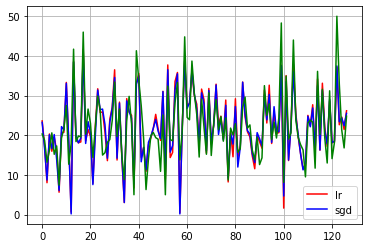

In [20]:
x=[i for i in range(len(y_test))]
plt.figure()
plt.plot(x,y_lr_predict,color='r',label='lr')
plt.plot(x,y_sgd_predict,color='b',label='sgd')
plt.plot(x,y_ture_test,color='g')
plt.legend()
plt.grid()

# 正规方程的均方根误差

In [22]:
mean_squared_error(y_ture_test,y_lr_predict)

21.606384761196242

In [23]:
mean_squared_error(y_ture_test,y_sgd_predict)

21.24575135153365

# 岭回归

In [10]:
rd=Ridge(alpha=1.0)
rd.fit(x_train,y_train)

Ridge()

In [11]:
y_rd_predict=rd.predict(x_test)
y_rd_predict=std_y.inverse_transform(y_rd_predict)

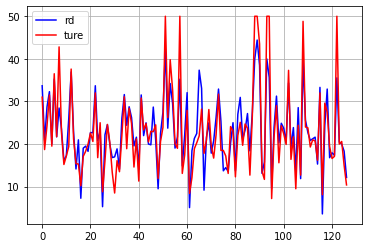

In [26]:
x=[i for i in range(len(y_test))]
plt.figure()
plt.plot(x,y_rd_predict,color='b',label='rd')
plt.plot(x,y_ture_test,color='r',label='ture')
plt.legend()
plt.grid()

In [24]:
mean_squared_error(y_ture_test,y_rd_predict)

21.070477595261416

# 模型的保存和加载

In [ ]:
# 保存训练好的模型
#joblib.dump(rd,'./temp/test.pkl')

# 读取数据
# model=joblib.load('./temp/test.pkl')
# y_rd_predict=std_y.inverse_transform(model.predict(y_rd_predict))